# Classification model to predict 10-year risk of future coronary heart disease (CHD) - Task 2 of ML Track

### About the dataset:

The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,240 records and 15 attributes.

### Task:
To use at least 10 numpy and sklearn library functions

# Importing Libraries

In [7]:
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np
# Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Data Resampling
from sklearn.utils import resample
# Data Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# Ensembling
from mlxtend.classifier import StackingCVClassifier

# Reading Dataset

In [8]:
data = pd.read_csv("C:\\Users\\indra\\My Projects\\Datasets\\framingham.csv") # Reading and converting the data into a pandas dataframe
data.shape # Calculating the dimensions of the dataset

(4240, 16)

In [9]:
data.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


This shows an overview of the Columns, non-null count and the data types of the dataset

### Attributes:

* **sex**: male(0) or female(1);(Nominal)
* **age**: age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
* **currentSmoker**: whether or not the patient is a current smoker (Nominal)
* **cigsPerDay**: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
* **BPMeds**: whether or not the patient was on blood pressure medication (Nominal)
* **prevalentStroke**: whether or not the patient had previously had a stroke (Nominal)
* **prevalentHyp**: whether or not the patient was hypertensive (Nominal)
* **diabetes**: whether or not the patient had diabetes (Nominal)
* **totChol**: total cholesterol level (Continuous)
* **sysBP**: systolic blood pressure (Continuous)
* **diaBP**: diastolic blood pressure (Continuous)
* **BMI**: Body Mass Index (Continuous)
* **heartRate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of a large number of possible values.)
* **glucose**: glucose level (Continuous)
* **10 year risk of coronary heart disease CHD** (binary: “1” means “Yes”, “0” means “No”) - Target Variable


# Data Inspecting and Cleaning 

In [11]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

It shows the number of np.nan or null values or missing values are present in the dataset:
* education: 105
* cigsPerDay: 29
* BPMeds: 53
* totChol: 50
* BMI: 19
* heartRate: 1
* glucose: 388

In [12]:
data.duplicated().sum()

0

It shows that there are no Duplicated Values present in the dataset.

In [13]:
print((data["glucose"].mode())[0])

75.0


In [14]:
data["glucose"].fillna((data["glucose"].mode())[0], inplace=True)

Filling the missing spaces of `glucose`column with the mode of the data (Mode = 75) present to reduce the number of missing data in our dataset

In [15]:
data.dropna(inplace=True)
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Dropping all other rows containing missing values

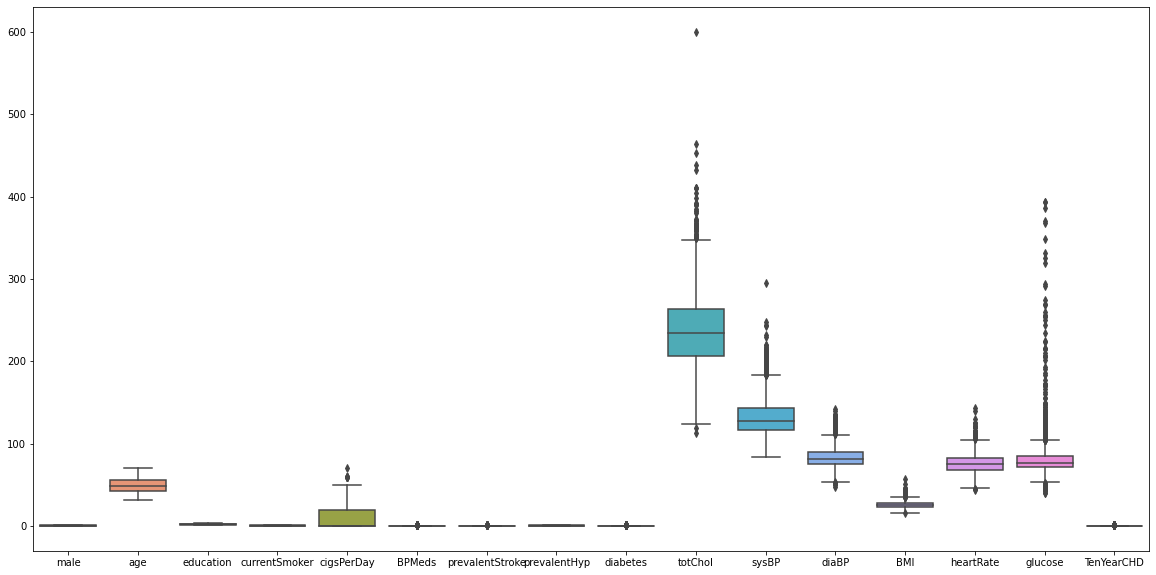

In [16]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=data)
plt.show()

Removable Outliers are detected in `totChol` and `sysBP` columns of our dataset. Outliers in all other numerical columns are important and thus cannot be removed.

In [17]:
data['totChol'].max()

600.0

The Outlier present in `totChol` is 600.

In [18]:
data['sysBP'].max()

295.0

The Outlier present in `sysBP` is 295.

In [19]:
data = data[data['totChol']<600.0]
data = data[data['sysBP']<295.0]
data.shape

(3987, 16)

Now with the missing values, outliers and duplicate values dealt with, we proceed to perform EDA

# Resampling imbalanced dataset by oversampling positive cases

In [20]:
target1=data[data['TenYearCHD']==1]
target0=data[data['TenYearCHD']==0]

In [21]:
target1=resample(target1,replace=True,n_samples=len(target0),random_state=40)

In [22]:
target=pd.concat([target0,target1])

In [23]:
target['TenYearCHD'].value_counts()

1    3394
0    3394
Name: TenYearCHD, dtype: int64

In [24]:
data=target
np.shape(data)

(6788, 16)

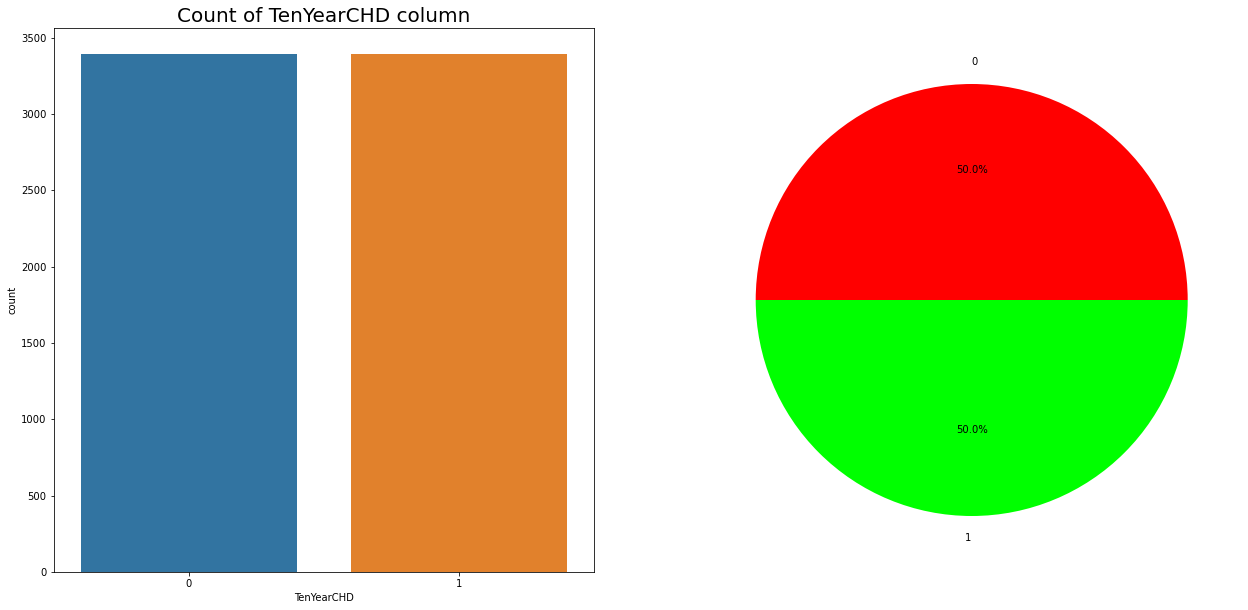

In [25]:
#Distribution of heart disease cases in the balanced dataset, the outcome variable
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="TenYearCHD", data=data)
plt.title("Count of TenYearCHD column", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(data["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["red","lime"])
plt.show()

The number of positive and negative cases are equal. Hence the classes are now balanced for model fitting

# Feature Selection


In [26]:
#To idenfify the features that have larger contribution towards the outcome variable, TenYearCHD
X=data.iloc[:,0:15]
y=data.iloc[:,-1]
print("X - ", X.shape, "\ny - ", y.shape)

X -  (6788, 15) 
y -  (6788,)


In [27]:
#Apply SelectKBest and extract top 10 features
best=SelectKBest(score_func=chi2, k=10)

In [28]:
fit=best.fit(X,y)

In [29]:
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)

In [30]:
#Join the two dataframes
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))

         Feature        Score
10         sysBP  2121.922128
14       glucose  1232.342416
1            age  1006.482991
4     cigsPerDay   788.788750
9        totChol   769.066248
11         diaBP   486.662514
7   prevalentHyp   221.104823
0           male    66.775610
5         BPMeds    66.216216
8       diabetes    54.258065
12           BMI    44.717502


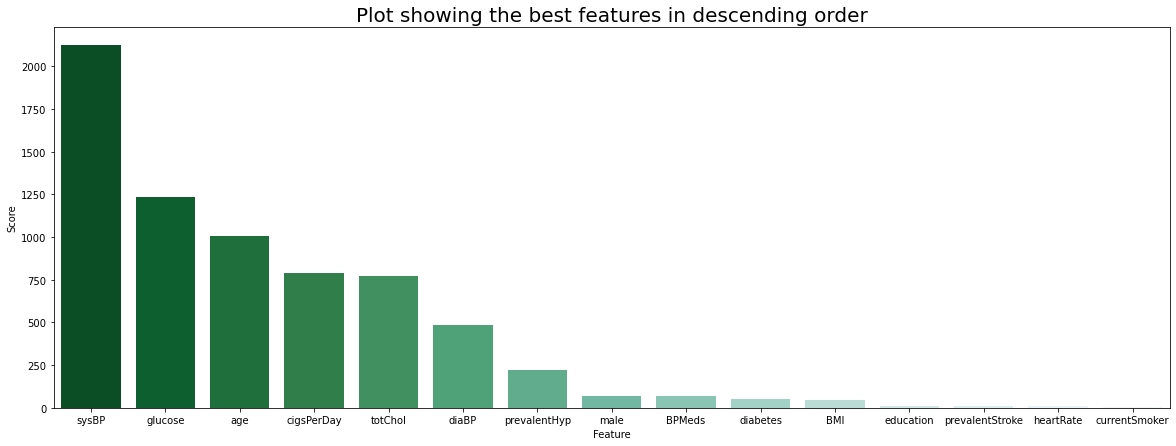

In [31]:
#To visualize feature selection
scores=scores.sort_values(by="Score", ascending=False)
plt.figure(figsize=(20,7), facecolor='w')
sns.barplot(x='Feature',y='Score',data=scores,palette='BuGn_r')
plt.title("Plot showing the best features in descending order", size=20)
plt.show()

This plot shows the `Features` and their respective `chi-square test` scores

In [32]:
#Select 10 features
features=scores["Feature"].tolist()[:10]
features

['sysBP',
 'glucose',
 'age',
 'cigsPerDay',
 'totChol',
 'diaBP',
 'prevalentHyp',
 'male',
 'BPMeds',
 'diabetes']

Only these features have strongest influence over the target variable. They are, in particular order:
* sysBP
* glucose
* age
* cigsPerDay
* totChol
* diaBP
* prevalentHyp
* male
* BPMeds
* diabetes


In [33]:
data=data[['sysBP','glucose','age','cigsPerDay','totChol','diaBP','prevalentHyp','male','BPMeds','diabetes','TenYearCHD']]
data.head()

,sysBP,glucose,age,cigsPerDay,totChol,diaBP,prevalentHyp,male,BPMeds,diabetes,TenYearCHD
0,106.0,77.0,39,0.0,195.0,70.0,0,1,0.0,0,0
1,121.0,76.0,46,0.0,250.0,81.0,0,0,0.0,0,0
2,127.5,70.0,48,20.0,245.0,80.0,0,1,0.0,0,0
4,130.0,85.0,46,23.0,285.0,84.0,0,0,0.0,0,0
5,180.0,99.0,43,0.0,228.0,110.0,1,0,0.0,0,0


# Feature Splitting and Scaling

In [34]:
y = data['TenYearCHD']
X = data.drop(['TenYearCHD'], axis=1)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)

We divide the dataset into training and test sub-datasets for predictive modeling

In [35]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

# Predictive Modeling

We use the following different machine learning models for the dataset:

1. Logistic Regressor
2. K-Nearest Neighbour Classifier
3. Random Forest Classifier
4. Decision Tree Classifier
5. Gradient Boosting Classifier
6. Extreme Gradient Boosting Classifier

In [36]:
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
model = lr.fit(train_x, train_y)
lr_predict = lr.predict(test_x)
lr_conf_matrix = confusion_matrix(test_y, lr_predict)
lr_acc_score = accuracy_score(test_y, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(test_y,lr_predict))

confussion matrix
[[879 473]
 [408 956]]


Accuracy of Logistic Regression: 67.56259204712813 

              precision    recall  f1-score   support

           0       0.68      0.65      0.67      1352
           1       0.67      0.70      0.68      1364

    accuracy                           0.68      2716
   macro avg       0.68      0.68      0.68      2716
weighted avg       0.68      0.68      0.68      2716



In [37]:
m2 = 'KNeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(train_x, train_y)
knn_predict = knn.predict(test_x)
knn_conf_matrix = confusion_matrix(test_y, knn_predict)
knn_acc_score = accuracy_score(test_y, knn_predict)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of k-NN Classification:",knn_acc_score*100,'\n')
print(classification_report(test_y, knn_predict))

confussion matrix
[[1106  246]
 [  26 1338]]


Accuracy of k-NN Classification: 89.98527245949927 

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      1352
           1       0.84      0.98      0.91      1364

    accuracy                           0.90      2716
   macro avg       0.91      0.90      0.90      2716
weighted avg       0.91      0.90      0.90      2716



In [38]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=200, random_state=0,max_depth=12)
rf.fit(train_x,train_y)
rf_predicted = rf.predict(test_x)
rf_conf_matrix = confusion_matrix(test_y, rf_predicted)
rf_acc_score = accuracy_score(test_y, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(test_y,rf_predicted))

confussion matrix
[[1140  212]
 [  49 1315]]


Accuracy of Random Forest: 90.39027982326951 

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      1352
           1       0.86      0.96      0.91      1364

    accuracy                           0.90      2716
   macro avg       0.91      0.90      0.90      2716
weighted avg       0.91      0.90      0.90      2716



In [39]:
m4 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 30)
dt.fit(train_x,train_y)
dt_predicted = dt.predict(test_x)
dt_conf_matrix = confusion_matrix(test_y, dt_predicted)
dt_acc_score = accuracy_score(test_y, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(test_y,dt_predicted))

confussion matrix
[[1075  277]
 [  31 1333]]


Accuracy of DecisionTreeClassifier: 88.65979381443299 

              precision    recall  f1-score   support

           0       0.97      0.80      0.87      1352
           1       0.83      0.98      0.90      1364

    accuracy                           0.89      2716
   macro avg       0.90      0.89      0.89      2716
weighted avg       0.90      0.89      0.89      2716



In [40]:
m5 = 'Gradient Boosting Classifier'
gvc =  GradientBoostingClassifier(learning_rate=0.01, max_depth=10, n_estimators=200)
gvc.fit(train_x,train_y)
gvc_predicted = gvc.predict(test_x)
gvc_conf_matrix = confusion_matrix(test_y, gvc_predicted)
gvc_acc_score = accuracy_score(test_y, gvc_predicted)
print("confussion matrix")
print(gvc_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting Classifier:",gvc_acc_score*100,'\n')
print(classification_report(test_y,gvc_predicted))

confussion matrix
[[1094  258]
 [  42 1322]]


Accuracy of Gradient Boosting Classifier: 88.95434462444771 

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      1352
           1       0.84      0.97      0.90      1364

    accuracy                           0.89      2716
   macro avg       0.90      0.89      0.89      2716
weighted avg       0.90      0.89      0.89      2716



In [41]:
m6 = 'Extreme Gradient Boosting Classifier'
xgb =  XGBClassifier(learning_rate=0.01, max_depth=10, n_estimators=500)
xgb.fit(train_x,train_y)
xgb_predicted = xgb.predict(test_x)
xgb_conf_matrix = confusion_matrix(test_y, xgb_predicted)
xgb_acc_score = accuracy_score(test_y, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting Classifier:",xgb_acc_score*100,'\n')
print(classification_report(test_y,xgb_predicted))

confussion matrix
[[1095  257]
 [  57 1307]]


Accuracy of Gradient Boosting Classifier: 88.43888070692194 

              precision    recall  f1-score   support

           0       0.95      0.81      0.87      1352
           1       0.84      0.96      0.89      1364

    accuracy                           0.88      2716
   macro avg       0.89      0.88      0.88      2716
weighted avg       0.89      0.88      0.88      2716



## Hyperparameter Tuning for best Classifier
#### Using Randomized Search Cross Validation

### Random Forest Classifier

In [42]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [43]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=7, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(train_x,train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.3min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=7, verbose=2)

In [44]:
rf_hyper = rf_random.best_estimator_
rf_hyper.fit(train_x,train_y)
print("Accuracy on training set is : {}".format(rf_hyper.score(train_x,train_y)))
print("Accuracy on validation set is : {}".format(rf_hyper.score(test_x, test_y)))
rf_predicted = rf_hyper.predict(test_x)
rf_acc_score = accuracy_score(test_y, rf_predicted)
print("Accuracy of Hyper-tuned Random Forest Classifier:",rf_acc_score*100,'\n')
print(classification_report(test_y, rf_predicted))

Accuracy on training set is : 1.0
Accuracy on validation set is : 0.9561855670103093
Accuracy of Hyper-tuned Random Forest Classifier: 95.61855670103093 

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1352
           1       0.94      0.97      0.96      1364

    accuracy                           0.96      2716
   macro avg       0.96      0.96      0.96      2716
weighted avg       0.96      0.96      0.96      2716



### Gradient Boosting Classifier

In [45]:
#Number of trees
n_estimators = [int(i) for i in np.linspace(start=100,stop=1000,num=10)]
#Number of features to consider at every split
max_features = ['auto','sqrt']
#Maximum number of levels in tree
max_depth = [int(i) for i in np.linspace(10, 100, num=10)]
max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split=[2,5,10]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4]

#Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [46]:
gb=GradientBoostingClassifier(random_state=0)
#Random search of parameters, using 3 fold cross validation, 
#search across 100 different combinations
gb_random = RandomizedSearchCV(estimator=gb, param_distributions=random_grid,
                              n_iter=100, scoring='f1', 
                              cv=3, verbose=2, random_state=0, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
gb_random.fit(train_x,train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 29.4min finished


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=0, return_train_score=True, scoring='f1',
                   verbose=2)

In [47]:
gb_hyper = gb_random.best_estimator_
gb_hyper.fit(train_x,train_y)
print("Accuracy on training set is : {}".format(gb_hyper.score(train_x,train_y)))
print("Accuracy on validation set is : {}".format(gb_hyper.score(test_x, test_y)))
gbc_predicted = gb_hyper.predict(test_x)
gbc_acc_score = accuracy_score(test_y, gbc_predicted)
print("Accuracy of Hyper-tuned Gradient Boosting Classifier:",gbc_acc_score*100,'\n')
print(classification_report(test_y, gbc_predicted))

Accuracy on training set is : 1.0
Accuracy on validation set is : 0.9823269513991163
Accuracy of Hyper-tuned Gradient Boosting Classifier: 98.23269513991163 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1352
           1       0.99      0.97      0.98      1364

    accuracy                           0.98      2716
   macro avg       0.98      0.98      0.98      2716
weighted avg       0.98      0.98      0.98      2716



### Extreme Gradient Boosting Classifier

In [48]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train_x,train_y)
gsearch1.best_params_, gsearch1.best_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'max_depth': 9, 'min_child_weight': 1}, 0.9634433648680785)

In [49]:
xgb_hyper = gsearch1.best_estimator_
xgb_hyper.fit(train_x, train_y)
print("Accuracy on training set is : {}".format(xgb_hyper.score(train_x,train_y)))
print("Accuracy on validation set is : {}".format(xgb_hyper.score(test_x, test_y)))
xgbc_predicted = xgb_hyper.predict(test_x)
xgbc_acc_score = accuracy_score(test_y, xgbc_predicted)
print("Accuracy of Hyper-tuned Extreme Gradient Boosting Classifier:",xgbc_acc_score*100,'\n')
print(classification_report(test_y, xgbc_predicted))

Accuracy on training set is : 0.9982809430255403
Accuracy on validation set is : 0.9134756995581738
Accuracy of Hyper-tuned Extreme Gradient Boosting Classifier: 91.34756995581738 

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      1352
           1       0.87      0.97      0.92      1364

    accuracy                           0.91      2716
   macro avg       0.92      0.91      0.91      2716
weighted avg       0.92      0.91      0.91      2716



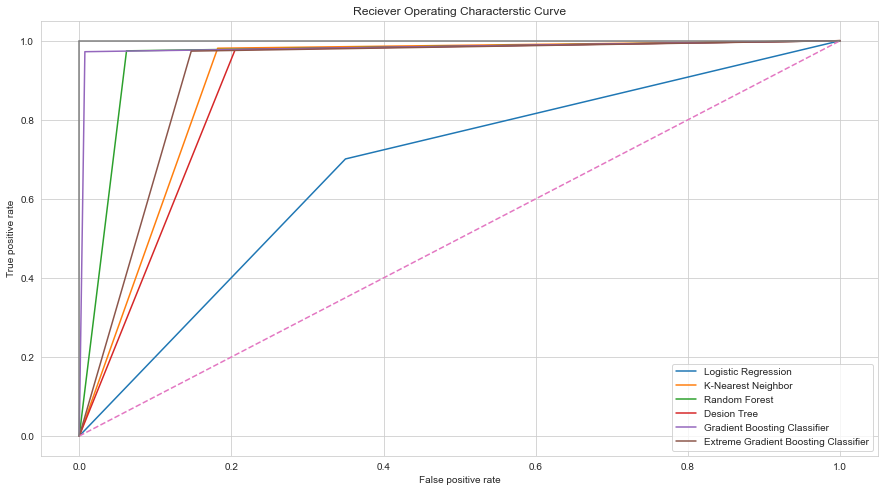

In [50]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(test_y,lr_predict)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(test_y,knn_predict)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(test_y,rf_predicted)                                                             
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(test_y,dt_predicted)
gbc_false_positive_rate,gbc_true_positive_rate,gbc_threshold = roc_curve(test_y,gbc_predicted)
xgbc_false_positive_rate,xgbc_true_positive_rate,xgbc_threshold = roc_curve(test_y,xgbc_predicted)

sns.set_style('whitegrid')
plt.figure(figsize=(15,8), facecolor='w')
plt.title('Reciever Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(gbc_false_positive_rate,gbc_true_positive_rate,label='Gradient Boosting Classifier')
plt.plot(xgbc_false_positive_rate,xgbc_true_positive_rate,label='Extreme Gradient Boosting Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

# Conclusion

## Thus its concluded that:
> ### Best Model: Gradient Boosting Classification( 98.23% )